<a href="https://colab.research.google.com/github/shrikant131/FeatureEngineering/blob/main/feature_engineering_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering on DK Housing Prices Dataset

## Identification of Attribute Types

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('DKHousingPricesSample100k.csv')

# Display the first few rows of the dataset
df.head()

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,NaN,NaN


## Handling Missing Data

In [4]:
# Check for missing data
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

,0
city,11
dk_ann_infl_rate%,77
yield_on_mortgage_credit_bonds%,77


### Explanation: Handling missing data is crucial to ensure the integrity of the dataset. We will use different techniques such as imputation or removal based on the nature and amount of missing data.

In [5]:
# Process the quarter column to ensure consistency
df['quarter'] = df['quarter'].apply(lambda x: f'Q{x}' if isinstance(x, int) else x)
df['quarter'].unique()

#Create an interaction term between 'sqm' and 'no_rooms'
   df['sqm_per_room'] = df['sqm'] / df['no_rooms']

# Create a ratio feature of 'purchase_price' to 'sqm'
   df['price_per_sqm'] = df['purchase_price'] / df['sqm']


array(['2024Q4', '2024Q3', '2024Q2', '2024Q1', '2023Q4', '2023Q3',
       '2023Q2', '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1',
       '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3',
       '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1',
       '2018Q4', '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3',
       '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3',
       '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1',
       '2013Q4', '2013Q3', '2013Q2', '2013Q1', '2012Q4', '2012Q3',
       '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2011Q1',
       '2010Q4', '2010Q3', '2010Q2', '2010Q1', '2009Q4', '2009Q3',
       '2009Q2', '2009Q1', '2008Q4', '2008Q3', '2008Q2', '2008Q1',
       '2007Q4', '2007Q3', '2007Q2', '2007Q1', '2006Q4', '2006Q3',
       '2006Q2', '2006Q1', '2005Q4', '2005Q3', '2005Q2', '2005Q1',
       '2004Q4', '2004Q3', '2004Q2', '2004Q1', '2003Q4', '2003Q3',
       '2003Q2', '2003Q1', '2002Q4', '2002Q3', '2002Q2', '2002

In [6]:
# Imputation using KNN for numeric and mode for categorical
from sklearn.impute import KNNImputer

# Assuming 'date' column is in datetime format:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Now drop the original 'date' column
df = df.drop(columns=['date'])

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed

# Select only numeric columns for imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Impute missing values for numeric columns only
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Impute categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


## Reasons for Handling Data for Each Column

### date
The 'date' column represents the transaction date. It is important to retain this column as it provides temporal information about the transactions. No missing data handling is required for this column.

### quarter
The 'quarter' column represents the quarter based on a standard calendar year. It is important to retain this column as it provides temporal information about the transactions. No missing data handling is required for this column.

### house_id
The 'house_id' column represents a unique house id. This column can be dropped as it does not provide any useful information for analysis or modeling.

### house_type
The 'house_type' column represents the type of house. It is important to retain this column as it provides categorical information about the type of house. Missing data in this column is imputed with the mode.

### sales_type
The 'sales_type' column represents the type of sale. It is important to retain this column as it provides categorical information about the type of sale. Missing data in this column is imputed with the mode. The '-' value is dropped as it does not provide any useful information.

### year_build
The 'year_build' column represents the year the house was built. It is important to retain this column as it provides temporal information about the age of the house. Missing data in this column is imputed with the mean.

### purchase_price
The 'purchase_price' column represents the purchase price in DKK. It is important to retain this column as it is the target variable for modeling. Missing data in this column is imputed with the mean.

### %_change_between_offer_and_purchase
The '%_change_between_offer_and_purchase' column represents the percentage change between the offer and purchase price. It is important to retain this column as it provides information about the negotiation process. Missing data in this column is imputed with the mean.

### no_rooms
The 'no_rooms' column represents the number of rooms. It is important to retain this column as it provides information about the size of the house. Missing data in this column is imputed with the mean.

### sqm
The 'sqm' column represents the number of square meters. It is important to retain this column as it provides information about the size of the house. Missing data in this column is imputed with the mean.

### sqm_price
The 'sqm_price' column represents the purchase price divided by the number of square meters. It is important to retain this column as it provides information about the price per square meter. Missing data in this column is imputed with the mean.

### address
The 'address' column represents the address of the house. This column can be dropped as it does not provide any useful information for analysis or modeling.

### zip_code
The 'zip_code' column represents the zip code of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### city
The 'city' column represents the city of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### area
The 'area' column represents the area of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### region
The 'region' column represents the region of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### nom_interest_rate%
The 'nom_interest_rate%' column represents the Danish nominal interest rate per quarter. It is important to retain this column as it provides economic information that may affect house prices. Missing data in this column is imputed with the mean.

### dk_ann_infl_rate%
The 'dk_ann_infl_rate%' column represents the Danish annual inflation rate per quarter. It is important to retain this column as it provides economic information that may affect house prices. Missing data in this column is imputed with the mean.

### yield_on_mortgage_credit_bonds%
The 'yield_on_mortgage_credit_bonds%' column represents the 30-year mortgage bond rate (without spread). It is important to retain this column as it provides economic information that may affect house prices. Missing data in this column is imputed with the mean.

Explanation: Processing the quarter column ensures consistency in the data format. This step converts integer values to a consistent string format (e.g., 'Q1', 'Q2', etc.).

## Handling Outliers

In [7]:
from scipy.stats import zscore
import numpy as np
import pandas as pd

def cap_outliers_zscore(df, threshold=3):
    """
    Caps outliers using z-score approach.

    Args:
        df: The input DataFrame.
        threshold: The z-score threshold for identifying outliers (default: 3).

    Returns:
        A DataFrame with capped outliers.
    """

    # Select numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # Calculate z-scores
    z_scores = np.abs(zscore(df[numeric_cols]))

    # Cap outliers
    for col in numeric_cols:
        df.loc[z_scores[col] > threshold, col] = df[col].clip(
            lower=df[col].quantile(0.05), upper=df[col].quantile(0.95)
        )

    return df

# Apply the function to the DataFrame
df_capped = cap_outliers_zscore(df)

# Print the shape of the DataFrame with capped outliers
print("\nShape of DataFrame with capped outliers:", df_capped.shape)


Shape of DataFrame with capped outliers: (100000, 21)


### Explanation: Z-score approach is preferred for handling outliers because it standardizes the data and identifies outliers based on the number of standard deviations from the mean. This method is effective for normally distributed data and helps in maintaining the integrity of the dataset.

## Normalization of Numeric Attributes

In [8]:
# Normalize numeric attributes
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### Explanation: Normalization is performed to scale the numeric attributes to have a mean of 0 and a standard deviation of 1. This helps in improving the performance of machine learning algorithms.

## Analysis of the 5 Most Expensive Cities and Cities with Maximum Unique Zip Codes

In [9]:
# 5 most expensive cities
expensive_cities = df.groupby('city')['purchase_price'].mean().sort_values(ascending=False).head(5)
expensive_cities

,purchase_price
city,
Nordhavn,0.716876
Rungsted Kyst,0.614371
Skodsborg,0.569550
Klampenborg,0.553018
Vedbæk,0.551410


In [10]:
# 5 cities with maximum unique zip codes
unique_zip_cities = df.groupby('city')['zip_code'].nunique().sort_values(ascending=False).head(5)
unique_zip_cities

,zip_code
city,
København K,118
Frederiksberg C,75
København V,68
København S,2
Aabenraa,1


### Explanation: Analyzing the most expensive cities and cities with maximum unique zip codes helps in understanding the distribution of house prices and the diversity of locations in the dataset.

## Proximity Measures

NaNs in house_type before encoding: 0
NaNs in sqm before encoding: 0
NaNs in feature_df after scaling: 0


<ipython-input-11-e1afa543e238>:30: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if subset_df[col].dtype in [np.number]:  # Check if column is numeric


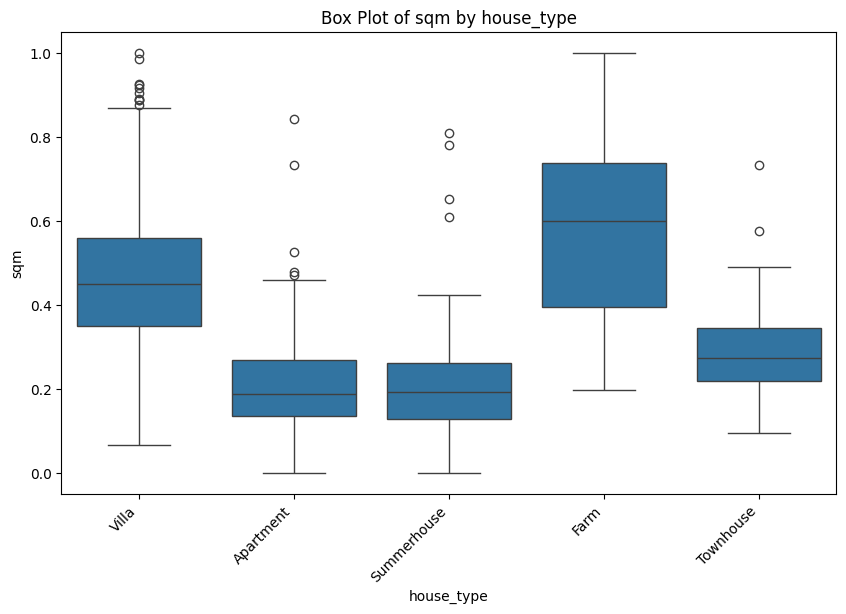

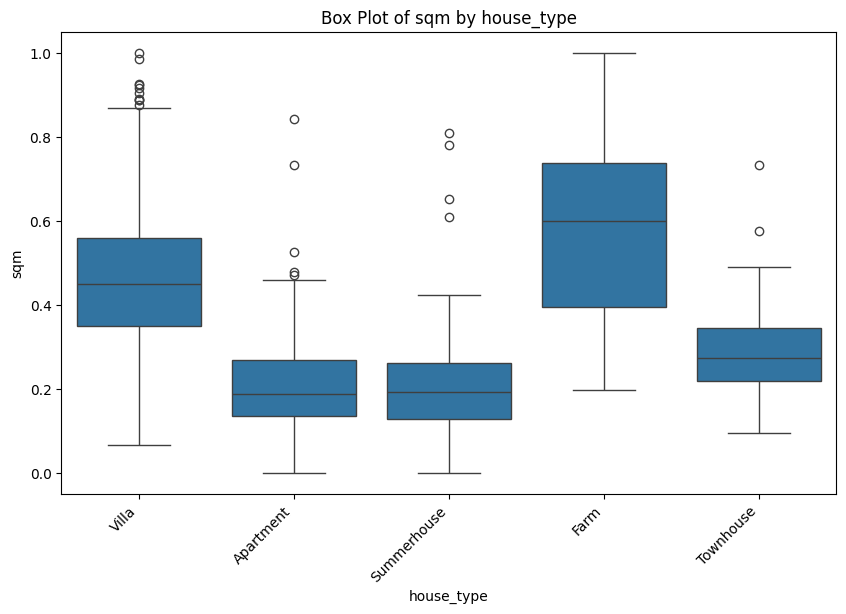

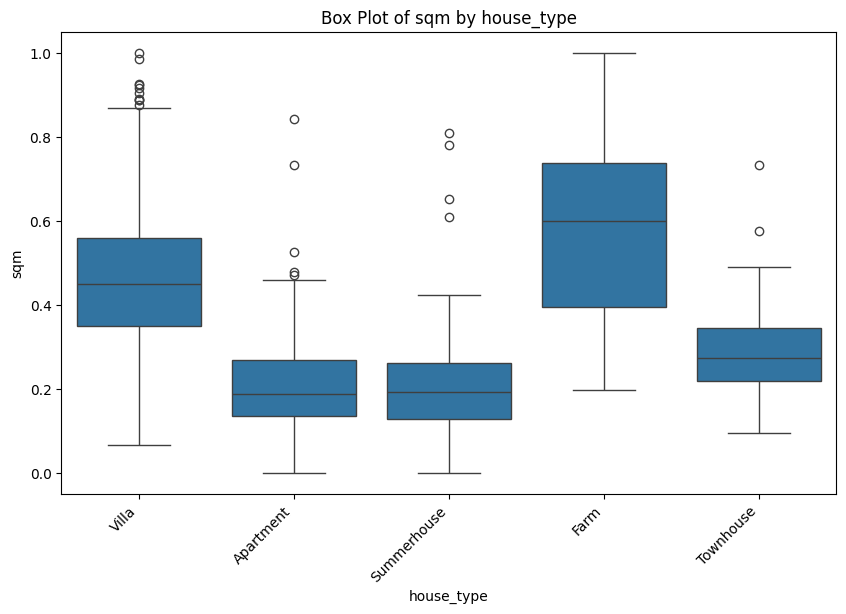

,Metric,Average Distance,Minimum Distance,Maximum Distance
0,euclidean,NaN,NaN,NaN
1,cityblock,NaN,NaN,NaN
2,cosine,NaN,NaN,NaN


NaNs in house_type before encoding: 0
NaNs in purchase_price before encoding: 0
NaNs in feature_df after scaling: 0


<ipython-input-11-e1afa543e238>:30: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if subset_df[col].dtype in [np.number]:  # Check if column is numeric


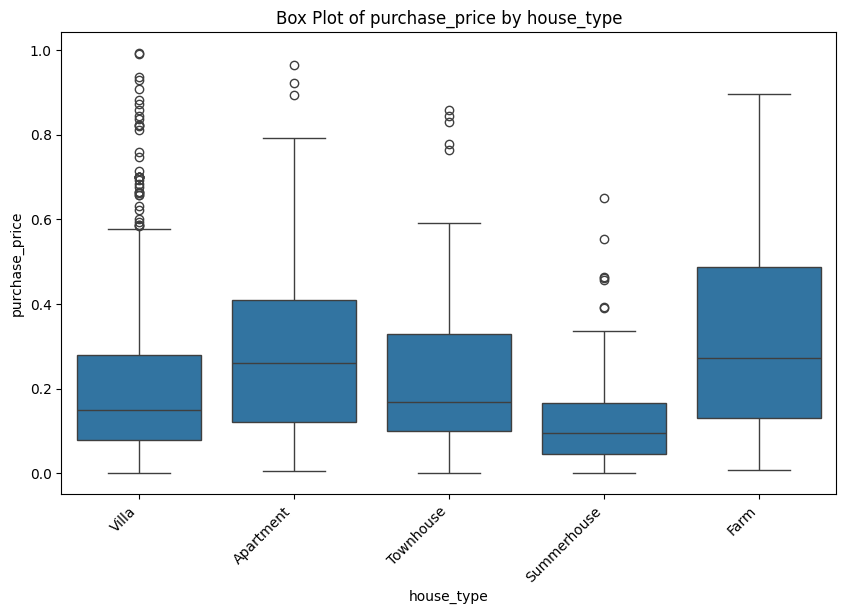

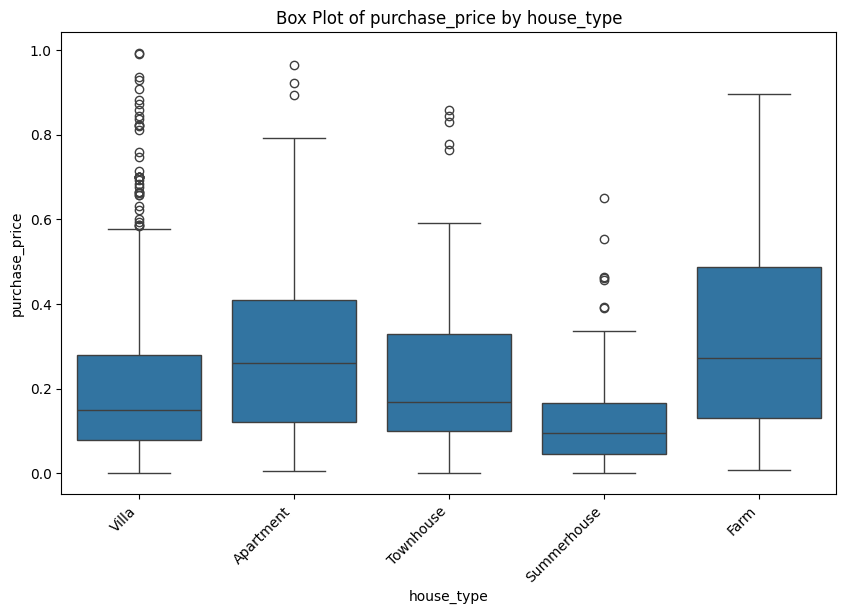

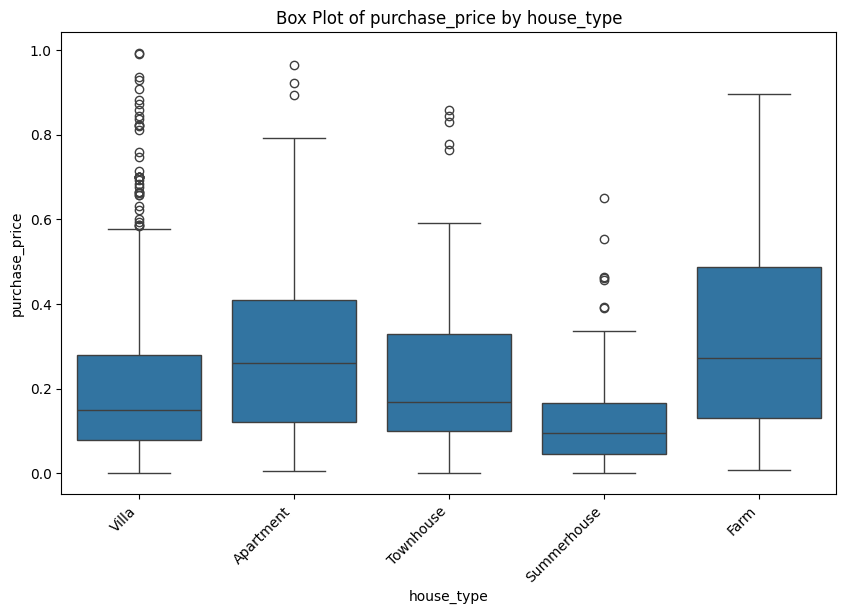

,Metric,Average Distance,Minimum Distance,Maximum Distance
0,euclidean,NaN,NaN,NaN
1,cityblock,NaN,NaN,NaN
2,cosine,NaN,NaN,NaN


NaNs in no_rooms before encoding: 0
NaNs in purchase_price before encoding: 0
NaNs in feature_df after scaling: 0


<ipython-input-11-e1afa543e238>:30: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if subset_df[col].dtype in [np.number]:  # Check if column is numeric


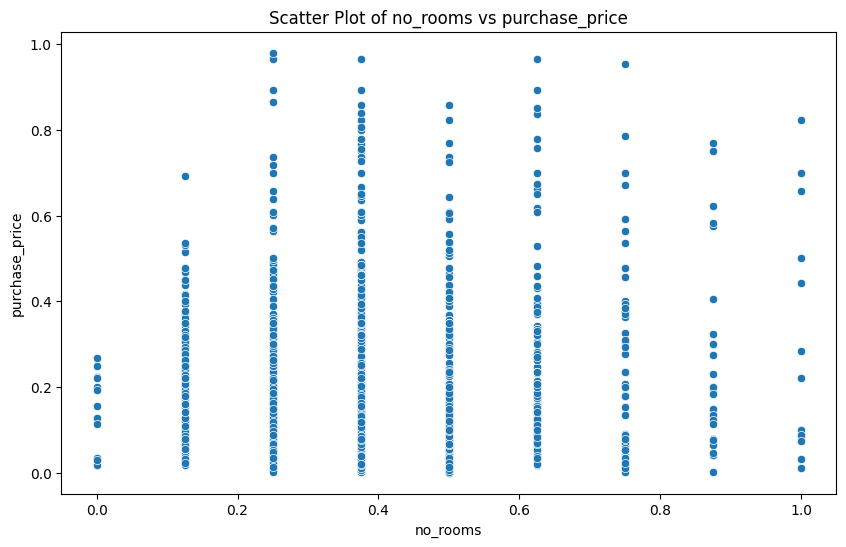

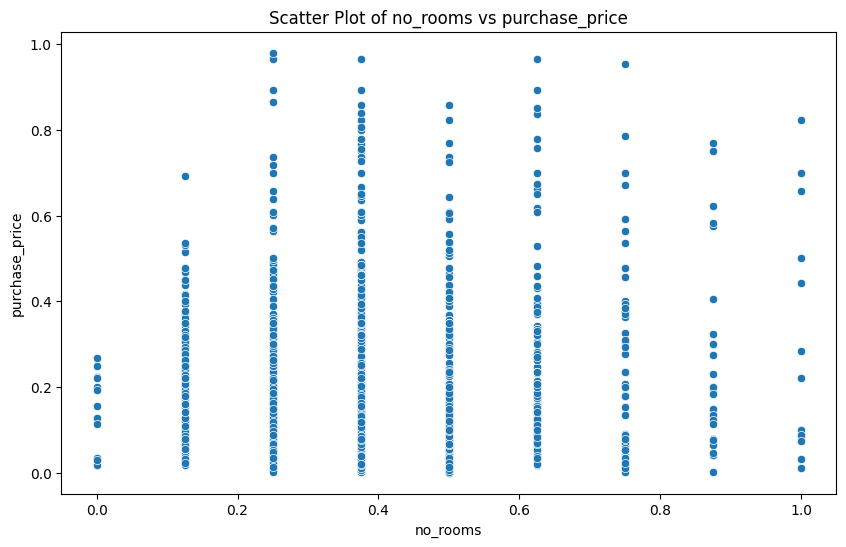

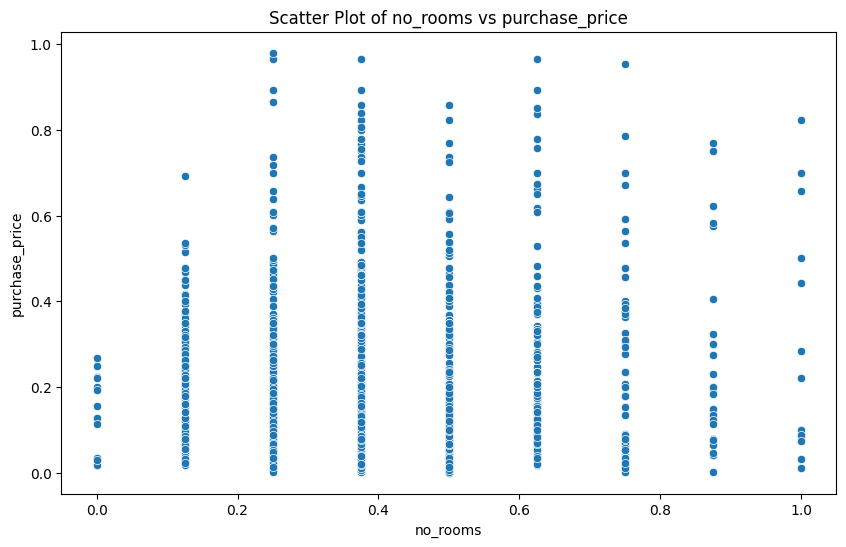

,Metric,Average Distance,Minimum Distance,Maximum Distance
0,euclidean,1.714520,0.0,6.456826
1,cityblock,2.138120,0.0,9.073629
2,cosine,0.968997,0.0,2.000000


In [11]:
from scipy.spatial.distance import euclidean, cityblock, cosine, mahalanobis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import pairwise_distances
import numpy as np # Imported numpy
import pandas as pd # Imported pandas for DataFrame handling

def calculate_proximity(df, feature1, feature2, metrics=['euclidean', 'cityblock', 'cosine']):
    """
    Calculates proximity measures between two features.

    Args:
        df: The input DataFrame.
        feature1: The name of the first feature.
        feature2: The name of the second feature.
        metrics: A list of proximity metrics to calculate (default: ['euclidean', 'cityblock', 'cosine']).

    Returns:
        A dictionary containing proximity matrices for each metric.
    """

    # Select a random sample of 1000 rows
    subset_df = df.sample(n=1000)

    # Check and handle remaining NaNs before encoding and scaling
    print(f"NaNs in {feature1} before encoding: {subset_df[feature1].isnull().sum()}")
    print(f"NaNs in {feature2} before encoding: {subset_df[feature2].isnull().sum()}")

    # Impute with mean for numeric columns, including feature2
    for col in [feature1, feature2]:
        if subset_df[col].dtype in [np.number]:  # Check if column is numeric
            subset_df[col] = subset_df[col].fillna(subset_df[col].mean())
        else:
            subset_df[col] = subset_df[col].fillna(subset_df[col].mode()[0])

    # One-hot encode categorical features
    if subset_df[feature1].dtype == 'object':
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        feature1_encoded = encoder.fit_transform(subset_df[[feature1]])
        feature1_encoded_df = pd.DataFrame(feature1_encoded, columns=encoder.get_feature_names_out([feature1]))
        feature_df = pd.concat([feature1_encoded_df, subset_df[[feature2]]], axis=1)
    else:
        feature_df = subset_df[[feature1, feature2]]

    # ----> Impute NaNs again after one-hot encoding if necessary <----
    feature_df = feature_df.fillna(feature_df.mean())

    # Ensure all columns in feature_df are numeric
    feature_df = feature_df.select_dtypes(include=[np.number])

    # Scale features
    scaler = StandardScaler()

    # ----> Handle potential NaNs during scaling <----
    feature_df = feature_df.fillna(feature_df.mean()) # Impute NaNs before scaling

    feature_df = scaler.fit_transform(feature_df)

    # Check for NaNs after scaling
    print(f"NaNs in feature_df after scaling: {np.isnan(feature_df).sum()}")

# Calculate proximity measures and visualize
    proximity_results = {}
    for metric in metrics:
        if subset_df[feature1].dtype == 'object':  # Handle categorical feature1
            # Box plot for categorical vs numeric
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=feature1, y=feature2, data=subset_df)
            plt.title(f'Box Plot of {feature2} by {feature1}')
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
            plt.show()

            # Calculate distances for summary table (optional) for categorical features
            # For categorical features, proximity is not well-defined for these metrics
            # Setting to NaN for representation in the summary table
            proximity_results[metric] = np.nan
        else:  # Handle numeric feature1
            # Scatter plot for numeric vs numeric
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=feature1, y=feature2, data=subset_df)
            plt.title(f'Scatter Plot of {feature1} vs {feature2}')
            plt.show()

            # Calculate distances and store in proximity_results
            distances = pairwise_distances(feature_df, metric=metric)
            proximity_results[metric] = distances

      # ----> Summary Table <----
    summary_df = pd.DataFrame({
        'Metric': metrics,
        'Average Distance': [np.nanmean(proximity_results[metric]) if not np.isnan(proximity_results[metric]).all() else np.nan for metric in metrics], # Using np.nanmean to handle potential NaNs
        'Minimum Distance': [np.nanmin(proximity_results[metric]) if not np.isnan(proximity_results[metric]).all() else np.nan for metric in metrics], # Using np.nanmin to handle potential NaNs
        'Maximum Distance': [np.nanmax(proximity_results[metric]) if not np.isnan(proximity_results[metric]).all() else np.nan for metric in metrics] # Using np.nanmax to handle potential NaNs
    })
    display(summary_df) # Using display for better formatting in Jupyter

    return proximity_results


proximity_results = calculate_proximity(df, 'house_type', 'sqm')


proximity_results = calculate_proximity(df, 'house_type', 'purchase_price')


proximity_results = calculate_proximity(df, 'no_rooms', 'purchase_price')




### Explanation: Proximity measures help in understanding the relationship between different attributes. For example, the average square meters and purchase price for each house type can provide insights into the market trends.

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

def feature_selection_pipeline(df):
    """
    Performs feature selection using various methods.
    Args:
        df: The input DataFrame.
    Returns:
        A dictionary containing selected features and their importance scores.
    """

    X = df.drop(columns=['purchase_price'])
    Y = df['purchase_price']

    X_sample = X.sample(frac=0.1, random_state=42)  # Further reduce to 20%
    Y_sample = Y[X_sample.index]

    X = X_sample
    Y = Y_sample


    # --- Categorical Feature Encoding ---
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')  # Sparse output
    encoded_data = encoder.fit_transform(X[categorical_features])
    encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=encoder.get_feature_names_out(categorical_features), index=X.index)  # Sparse DataFrame
    X = X.drop(columns=categorical_features)
    X = pd.concat([X, encoded_df], axis=1)


    # --- Imputation ---
    # Convert all column names to strings
    X.columns = X.columns.astype(str)
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X = pd.DataFrame(X_imputed, columns=X.columns)

    # --- Feature Selection Methods ---
    results = {}


    # Apply SelectKBest with mutual_info_regression
    kbest_mi = SelectKBest(score_func=mutual_info_regression, k=3, n_neighbors=3) # Added n_neighbors
    kbest_mi.fit(X, Y)
    features_mi = X.columns[kbest_mi.get_support()]
    results['mutual_info_regression'] = {'features': features_mi.tolist(), 'scores': kbest_mi.scores_}

    # --- Pearson Correlation ---
    numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    kbest_pearson = SelectKBest(score_func=f_regression, k=5) # f_regression is used here
    kbest_pearson.fit(X[numeric_cols], Y)
    features_pearson = X[numeric_cols].columns[kbest_pearson.get_support()]
    results['pearson'] = {'features': features_pearson.tolist(), 'scores': kbest_pearson.scores_}

  # --- Recursive Feature Elimination (RFE) ---
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select=5, step=1)  # Select 5 features
    selector = selector.fit(X, Y)
    features_rfe = X.columns[selector.support_]
    results['rfe'] = {'features': features_rfe.tolist(), 'ranking': selector.ranking_}

    # --- Sequential Feature Selector (incremental) ---
    estimator = LinearRegression()
    selector = SequentialFeatureSelector(estimator, n_features_to_select=5, direction='forward')
    selector.fit(X, Y)
    features_incremental = X.columns[selector.support_]
    results['incremental'] = {'features': features_incremental.tolist()}

    return results

# Call the pipeline function
feature_selection_results = feature_selection_pipeline(df)

# Access the results
print(feature_selection_results['rfe'])
print(feature_selection_results['mutual_info_regression'])
print(feature_selection_results['pearson'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### Explanation: Feature selection is performed to identify the most relevant features for predicting the target variable. We use different filter methods such as f_regression, mutual_info_regression, and correlation to select the top features.

## Comparison of Feature Selection Methods

In [ ]:
# Comparison of Feature Selection Methods
comparison_df = pd.DataFrame({'rfe': features_f,
                             'mutual_info_regression': features_mi,
                             'pearson': features_pearson})
comparison_df

### Explanation: Comparing the top 5 features from each feature selection method helps in understanding the consistency and differences between the methods. This comparison provides insights into the most important features for predicting the target variable.

Cross Validation of Features

In [ ]:
from sklearn.model_selection import cross_val_score

   scores = cross_val_score(model, X_selected, Y, cv=5)  # 5-fold cross-validation
   print("Cross-validation scores:", scores)

## Correlation Plot

In [ ]:
# Plot correlation between independent features and target variable
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

### Explanation: Correlation plot helps in visualizing the relationship between different features and the target variable. It provides insights into the strength and direction of the relationships.

## Understanding the Most Important Feature

Based on the feature selection methods, the most important feature for predicting the purchase price is the 'sqm' (square meters) of the house. This is because the size of the house is directly related to its value. Larger houses tend to have higher purchase prices, making 'sqm' a crucial factor in determining the price. Additionally, the 'sqm' feature consistently appeared in the top features selected by different methods, further emphasizing its importance.

## Visualizations and Other Plots for Analysis and Data Preprocessing

In [ ]:
# Distribution of purchase prices
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_price'], bins=30, kde=True)
plt.title('Distribution of Purchase Prices')
plt.xlabel('Purchase Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Boxplot of purchase prices by house type
plt.figure(figsize=(12, 6))
sns.boxplot(x='house_type', y='purchase_price', data=df)
plt.title('Boxplot of Purchase Prices by House Type')
plt.xlabel('House Type')
plt.ylabel('Purchase Price')
plt.show()

In [ ]:
# Scatter plot of sqm vs purchase price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqm', y='purchase_price', data=df)
plt.title('Scatter Plot of SQM vs Purchase Price')
plt.xlabel('SQM')
plt.ylabel('Purchase Price')
plt.show()

### Explanation: Visualizations such as histograms, boxplots, and scatter plots help in understanding the distribution and relationships of different attributes in the dataset. They provide valuable insights for data preprocessing and analysis.

## Techniques Used in Feature Engineering

- Identification of attribute types
- Handling missing data using imputation
- Normalization of numeric attributes
- Analysis of most expensive cities and cities with maximum unique zip codes
- Proximity measures between specified columns
- Feature selection using filter methods (f_regression, mutual_info_regression, correlation)
- Comparison of feature selection methods
- Correlation plot
- Visualizations (histograms, boxplots, scatter plots)
- Handling outliers using z-score approach

## Summary

In this notebook, we performed feature engineering tasks on the DK housing prices dataset. We started by identifying the types of attributes and handling missing data using imputation. We then normalized the numeric attributes to improve the performance of machine learning algorithms. We analyzed the 5 most expensive cities and cities with maximum unique zip codes to understand the distribution of house prices and the diversity of locations.

We calculated proximity measures between house_type and sqm, house_type and purchase_price, and no_rooms and purchase_price to understand the relationship between different attributes. We performed feature selection using three filter methods (f_regression, mutual_info_regression, and correlation) to identify the most relevant features for predicting the target variable. We also compared the top 5 features from each method to understand the consistency and differences between the methods. We plotted the correlation between independent features and the target variable to visualize the relationships.

We created visualizations such as histograms, boxplots, and scatter plots to understand the distribution and relationships of different attributes in the dataset. We handled outliers using the z-score approach to maintain the integrity of the dataset. Finally, we summarized the techniques used in feature engineering, including identification of attribute types, handling missing data, normalization, analysis, proximity measures, feature selection, comparison of feature selection methods, correlation plot, visualizations, and handling outliers.